In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
# ライブラリの読み込み
%matplotlib inline
# 小数第3位まで表示
%precision 3
# その他設定
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv(r"C:\Users\owner\Desktop\メタバース工学部\最終課題\使うファイル\[任意のファイル名1].csv")
df2 = pd.read_csv(r"C:\Users\owner\Desktop\メタバース工学部\最終課題\使うファイル\[任意のファイル名2].csv")

In [6]:
print('データのデータ数は{}、変数は{}種類です。'.format(df1.shape[0], df1.shape[1]))

データのデータ数は100000、変数は50種類です。


In [7]:
print('データのデータ数は{}、変数は{}種類です。'.format(df2.shape[0], df2.shape[1]))

データのデータ数は100000、変数は50種類です。


In [8]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 50 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   uniqsubs          100000 non-null  int64  
 1   actvsubs          100000 non-null  int64  
 2   new_cell          100000 non-null  object 
 3   crclscod          100000 non-null  object 
 4   asl_flag          100000 non-null  object 
 5   totcalls          100000 non-null  int64  
 6   totmou            100000 non-null  float64
 7   totrev            100000 non-null  float64
 8   adjrev            100000 non-null  float64
 9   adjmou            100000 non-null  float64
 10  adjqty            100000 non-null  int64  
 11  avgrev            100000 non-null  float64
 12  avgmou            100000 non-null  float64
 13  avgqty            100000 non-null  float64
 14  avg3mou           100000 non-null  int64  
 15  avg3qty           100000 non-null  int64  
 16  avg3rev           100

In [9]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 50 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   rev_Mean         99643 non-null   float64
 1   mou_Mean         99643 non-null   float64
 2   totmrc_Mean      99643 non-null   float64
 3   da_Mean          99643 non-null   float64
 4   ovrmou_Mean      99643 non-null   float64
 5   ovrrev_Mean      99643 non-null   float64
 6   vceovr_Mean      99643 non-null   float64
 7   datovr_Mean      99643 non-null   float64
 8   roam_Mean        99643 non-null   float64
 9   change_mou       99109 non-null   float64
 10  change_rev       99109 non-null   float64
 11  drop_vce_Mean    100000 non-null  float64
 12  drop_dat_Mean    100000 non-null  float64
 13  blck_vce_Mean    100000 non-null  float64
 14  blck_dat_Mean    100000 non-null  float64
 15  unan_vce_Mean    100000 non-null  float64
 16  unan_dat_Mean    100000 non-null  float

契約率を可視化

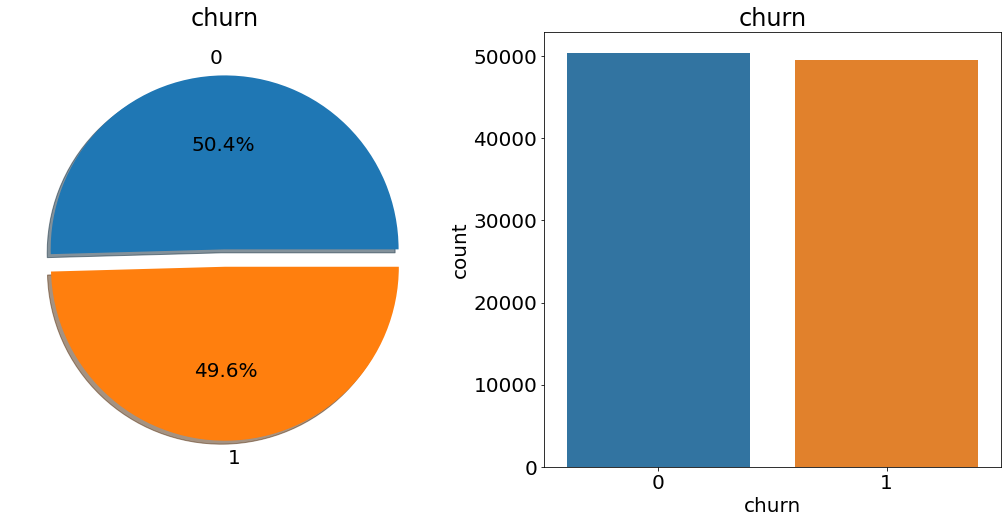

In [21]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df2['churn'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('churn')
ax[0].set_ylabel('')
sns.countplot('churn',data=df2,ax=ax[1])
ax[1].set_title('churn')
plt.show()

In [10]:
df1.columns[df1.dtypes.values == "object"]

Index(['new_cell', 'crclscod', 'asl_flag', 'prizm_social_one', 'area',
       'dualband', 'refurb_new', 'hnd_webcap', 'ownrent', 'dwlltype',
       'marital', 'infobase', 'HHstatin', 'dwllsize', 'ethnic', 'kid0_2',
       'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd'],
      dtype='object')

In [12]:
categ_nominal = ['new_cell', 'crclscod', 'asl_flag', 'prizm_social_one', 'area',
       'dualband', 'refurb_new', 'hnd_webcap', 'ownrent', 'dwlltype',
       'marital', 'infobase', 'HHstatin', 'dwllsize', 'ethnic', 'kid0_2',
       'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd']

In [13]:
for i in categ_nominal:
    df1 = pd.concat([df1, pd.get_dummies(df1[i], prefix=i, dummy_na=True)], sort=False, axis=1)
df1 = df1.drop(categ_nominal, axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 203 entries, uniqsubs to creditcd_nan
dtypes: float64(21), int64(8), uint8(174)
memory usage: 38.7 MB


In [14]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb

In [15]:
df = pd.concat([df1, df2], axis=1)
df

,uniqsubs,actvsubs,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,...,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months
0,2,1,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,...,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61
1,1,1,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,...,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,0,56
2,1,1,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,...,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,1,58
3,1,1,1502,3065.00000,2000.90,1941.81,3035.00,1479,40.45,63.23,...,0.0,5.450000,0.0,0.000000,3.666667,3.666667,0.0,0.000000,0,60
4,1,1,4485,14028.00000,2181.12,2166.48,13965.00,4452,38.69,249.38,...,0.0,218.086667,0.0,10.333333,222.333333,137.000000,0.0,0.000000,0,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,1,3771,9534.00000,1594.83,1561.14,9494.00,3751,74.34,452.10,...,0.0,73.316667,0.0,2.000000,54.666667,45.333333,0.0,0.000000,1,25
99996,1,1,3675,8887.00000,1517.10,1451.85,8805.00,3629,72.59,440.25,...,0.0,0.383333,0.0,4.000000,69.333333,53.333333,0.0,0.000000,0,27
99997,1,1,1271,9336.00000,1114.91,1055.93,9234.00,1238,55.58,486.00,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0,31
99998,1,1,10082,20784.00000,2669.20,2593.26,20488.00,9921,123.49,975.62,...,0.0,253.893333,0.0,19.333333,551.000000,417.333333,0.0,0.000000,0,25


In [16]:
X = df.drop('churn',axis=1) 
y = df['churn'] # 目的変数
# トレーニングデータ,テストデータの分割
X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size=0.2, random_state=0)

In [39]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train) 

params = {
        'task': 'train',
        'boosting_type': 'gbdt',
        'objective': 'binary', # 目的 : 分類
        'metric': 'binary_logloss',
         'num_leaves': 20,             
        'max_depth':5,
        'min_data_in_leaf': 3,        
        'num_iteration': 100,            
        'learning_rate':0.03,
        'num_boost_round':100,
         'early_stopping_rounds':20, 
}
# モデルの学習
model = lgb.train(params,
                  train_set=lgb_train, # トレーニングデータの指定
                  valid_sets=lgb_eval, # 検証データの指定
                  )

# テストデータの予測
y_pred = model.predict(X_valid)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 39665, number of negative: 40335
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 15246
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 243
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495812 -> initscore=-0.016750
[LightGBM] [Info] Start training from score -0.016750
[1]	valid_0's binary_logloss: 0.691199
Training until validation scores don't improve for 20 rounds
[2]	valid_0's binary_logloss: 0.68941
[3]	valid_0's binary_logloss: 0.687707
[4]	valid_0's binary_logloss: 0.686099
[5]	valid_0's binary_logloss: 0.684592
[6]	valid_0's binary_l

データを可視化

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

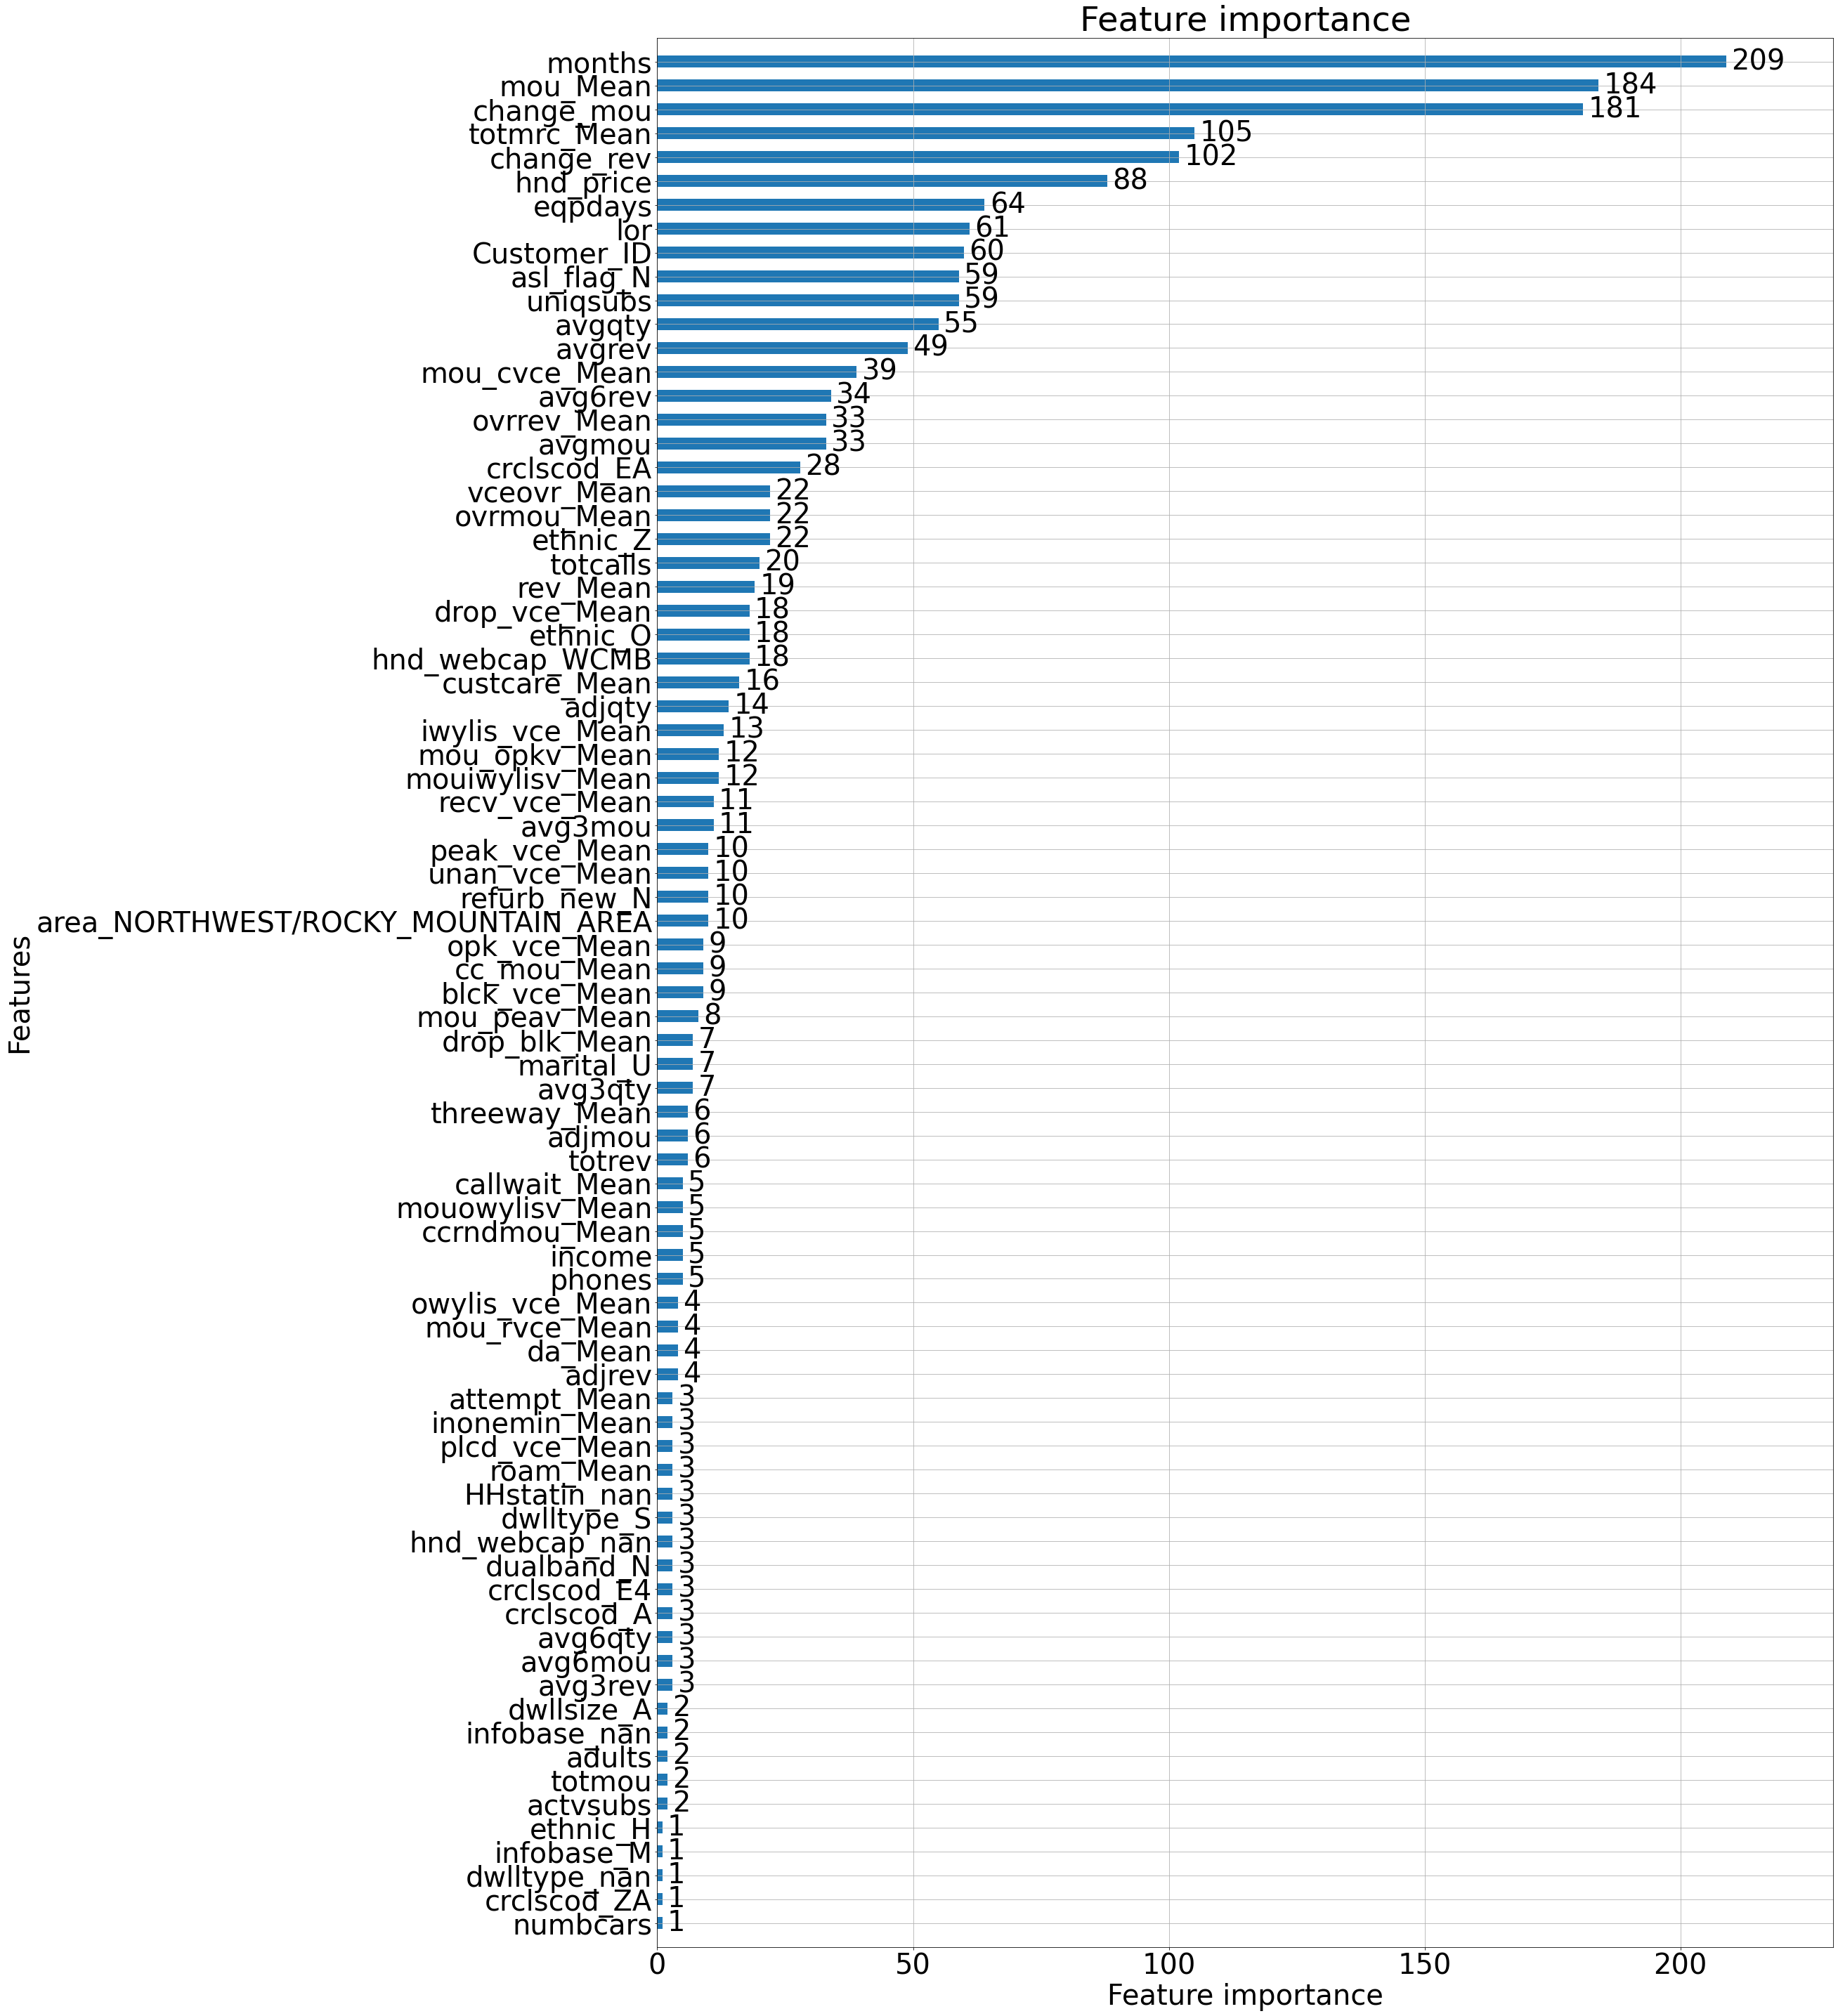

In [40]:
plt.rcParams["font.size"] = 40
lgb.plot_importance(model, height=0.5, figsize=(30,50))

<AxesSubplot:xlabel='churn', ylabel='hnd_price'>

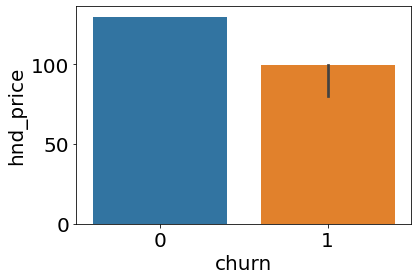

In [19]:
plt.rcParams["font.size"] = 20
sns.barplot(x='churn', y='hnd_price', data=df, estimator=np.median)

<AxesSubplot:xlabel='churn', ylabel='change_mou'>

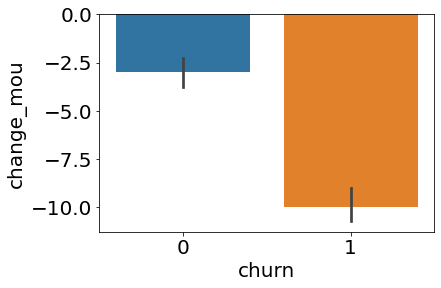

In [24]:
sns.barplot(x='churn', y='change_mou', data=df, estimator=np.median)

<AxesSubplot:xlabel='churn', ylabel='months'>

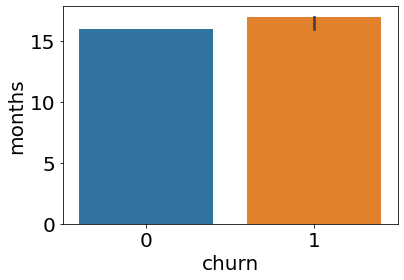

In [25]:
sns.barplot(x='churn', y='months', data=df, estimator=np.median)

<AxesSubplot:xlabel='churn', ylabel='mou_Mean'>

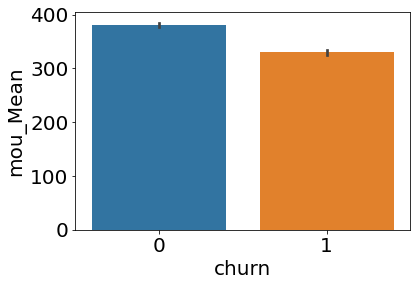

In [27]:
sns.barplot(x='churn', y='mou_Mean', data=df, estimator=np.median)

<AxesSubplot:xlabel='churn', ylabel='rev_Mean'>

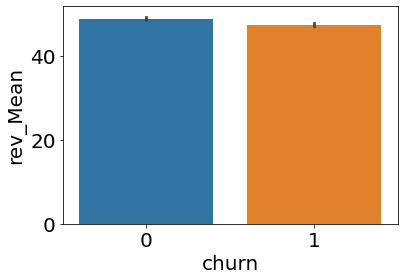

In [29]:
sns.barplot(x='churn', y='rev_Mean', data=df, estimator=np.median)

<AxesSubplot:xlabel='churn', ylabel='change_rev'>

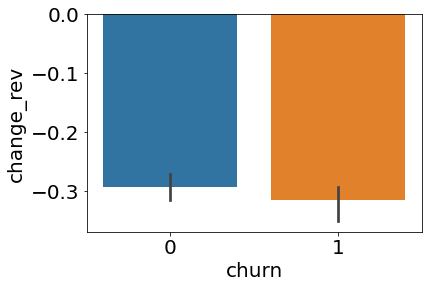

In [31]:
sns.barplot(x='churn', y='change_rev', data=df, estimator=np.median)

<AxesSubplot:xlabel='churn', ylabel='totmrc_Mean'>

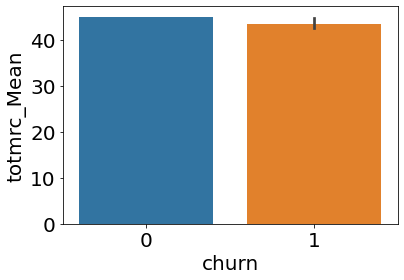

In [32]:
sns.barplot(x='churn', y='totmrc_Mean', data=df, estimator=np.median)

In [33]:
loss_sum=df[df["churn"]==1]
loss_sum['rev_Mean'].sum()

2870795.533

通貨単位をドルとすると2870795ドルの損失があることがわかった

In [41]:
from sklearn import svm
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_valid, y_pred)

# AUCの算出
auc = auc(fpr, tpr)
auc

0.680

In [42]:
df['mou_Mean'].mean()

513.560

In [43]:
X_valid

,uniqsubs,actvsubs,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,...,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,months
3582,1,1,1185,2508.0,953.93,782.57,2501.0,1180,20.59,65.82,...,7.333333,0.0,6.540000,0.0,0.333333,23.000000,21.000000,0.0,0.000000,39
60498,2,2,880,2167.0,171.08,131.09,2153.0,874,11.92,195.73,...,8.666667,0.0,7.596667,0.0,10.666667,51.333333,29.333333,0.0,0.000000,13
53227,3,2,1799,3979.0,609.99,518.91,3513.0,1565,32.43,219.56,...,12.666667,0.0,13.473333,0.0,4.666667,53.000000,45.000000,0.0,0.000000,18
21333,1,1,1079,3367.0,1190.46,1143.48,3331.0,1059,57.17,166.55,...,117.333333,0.0,570.316667,0.0,4.666667,155.333333,124.333333,0.0,0.666667,22
3885,1,1,1779,6448.0,1464.83,1413.56,6434.0,1774,45.60,207.55,...,22.333333,0.0,55.530000,0.0,7.333333,98.000000,76.666667,0.0,0.000000,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60116,1,1,3097,12120.0,1073.42,993.44,12086.0,3084,90.31,1098.73,...,166.000000,0.0,362.830000,0.0,32.666667,260.666667,226.666667,0.0,4.333333,13
2415,1,1,4145,6992.0,1931.05,1888.47,6968.0,4126,51.04,188.32,...,18.666667,0.0,22.350000,0.0,5.000000,105.000000,88.333333,0.0,0.333333,38
43763,1,1,4051,6774.0,782.27,749.37,6747.0,4037,37.47,337.35,...,86.000000,0.0,100.490000,0.0,12.000000,153.333333,137.000000,0.0,0.000000,21
71345,2,1,263,872.0,258.03,200.05,782.0,240,33.34,130.33,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,8


解約率の予測

In [44]:
y_pred.mean()

0.496

試作導入後の解約率

In [56]:
X_valid['mou_Mean']*=1.5

In [61]:
X_valid['change_mou']+=30

In [58]:
X_valid["hnd_price"]+=30

In [53]:
X = df[["months","mou_Mean","change_mou","totmrc_Mean","change_rev","hnd_price","lor","asl_flag_N","Customer_ID","eqpdays"]]
y = df["churn"] # 目的変数
# トレーニングデータ,テストデータの分割
X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size=0.2, random_state=0)

In [62]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train) 

# パラメータ
params = {
        'task': 'train',
        'boosting_type': 'gbdt',
        'objective': 'binary', # 目的 : 分類
        'metric': {'auc'},
         'num_leaves': 20,             
        'max_depth':5,
        'min_data_in_leaf': 3,        
        'num_iteration': 100,            
        'learning_rate':0.03,
        'num_boost_round':100,
         'early_stopping_rounds':20, 
}

# モデルの学習
model = lgb.train(params,
                  train_set=lgb_train, # トレーニングデータの指定
                  valid_sets=lgb_eval, # 検証データの指定
                  )

# テストデータの予測
y_pred = model.predict(X_valid)

[LightGBM] [Info] Number of positive: 39665, number of negative: 40335
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001460 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1623
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495812 -> initscore=-0.016750
[LightGBM] [Info] Start training from score -0.016750
[1]	valid_0's auc: 0.631051
Training until validation scores don't improve for 20 rounds
[2]	valid_0's auc: 0.63387
[3]	valid_0's auc: 0.635042
[4]	valid_0's auc: 0.635
[5]	valid_0's auc: 0.635781
[6]	valid_0's auc: 0.635878
[7]	valid_0's auc: 0.636052
[8]	valid_0's auc: 0.637363
[9]	valid_0's auc: 0.641757
[10]	valid_0's auc: 0.64227
[11]	valid_0's auc: 0.643179
[12]	valid_0's auc: 0.645913
[13]	valid_0's auc: 0.645937
[14]	valid_0's auc: 0.646127
[15]	valid_0's auc: 0.646596
[16]	valid_0's auc: 0

In [63]:
y_pred.mean()

0.468